In [36]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation


# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

# Review

## Extrapolation

What is extrapolation and why is it dangerous?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>

### Real Life Extrapolation
[Ironman Data](https://www.outsideonline.com/health/training-performance/sub-seven-hour-ironman-attempt/)


## The Bias Variance Tradeoff

$$ \underbrace{E(y_0 - \hat{f}(x_0))^2}_\text{expected MSE at $x_0$} = \overbrace{Var(\hat{f}(x_0))}^\text{variance of the model when fit on different samples} + \underbrace{[Bias(\hat{f}(x_0))]^2}_\text{ability of the model to "get it right" on average} + \overbrace{Var(\epsilon)}^\text{irreducible error}$$

<img src="https://drive.google.com/uc?export=view&id=1akEMD7_STAkqJcZUI5vc3CW5aU5AeTWR" alt="Q" width = 500px/>'

What are we looking for when trying to see if there is overfitting?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>


### Overfitting
What is Overfitting and how is it different from extrapolation?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>


## Model Validation 

We learned about 3 types of model validation that help us estimate how well our model might do on data it has never seen before. 

- **Train Test Split (TTS)**: We take our data and break it up into two groups, training (used to fit model) and testing (used to see how the model does on data it has never seen before)
- **K-Fold Cross Validation (KF)**: We take our data and break it up into K groups. We train K different models using a different group as the test set each time. The other K-1 groups are used to train the model. 
- **Leave One Out Cross Validation (LOO)**: Like K-Fold but each data point is it's own fold. This means we fit N models (where N is the number of data points) using N-1 data points to train, and 1 data point to test. 


Remember the purpose of a test set is to be UNSEEN data. We should NEVER fit ANYTHING on the test set. In fact we should not even TOUCH the test set until our model is completely done training.

Let's modify the code building a Linear Regression to predict `Amazon Price` to include model validation.

### Train Test Split

In [ ]:
# # Load Data
# ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
#                  sep = "\t")
# ama.head()

# # drop missing values
# ama.dropna(inplace = True)
# ama.reset_index(inplace = True)

# # set up X and y
# predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

# X = ama[predictors]
# y = ama["Amazon Price"]

# # z score
# z = make_column_transformer((StandardScaler(), predictors),
#                             remainder = "passthrough")

# lr = LinearRegression()

# pipe = Pipeline([("zscore", z),
#                 ("linearregression", lr)])

# # fit
# pipe.fit(X,y)

# # predict
# y_pred = pipe.predict(X)

# # assess
# print("MSE : ", mean_squared_error(y,y_pred))
# print("MAE : ", mean_absolute_error(y,y_pred))
# print("MAPE: ", mean_squared_error(y,y_pred))
# print("R2  : ", r2_score(y,y_pred))


# Train Test Split
# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# validation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

### K-Fold

In [ ]:
# K-Fold

# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

### Leave One Out

In [ ]:
# Leave One Out

# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# validation
kf = LeaveOneOut()

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))


print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))


### Assumption Checks with TTS, KF, LOO
When checking assumptions AND using model validation, when do we check assumptions?

Creating a residual plot requires we have residuals, which requires a model. Check assumptions *after* fitting the model by making residual plot(s).



In [ ]:
# Train Test Split
# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# validation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# assump
assump_train = pd.DataFrame({"predicted": y_pred_train,
                        "errors": y_train - y_pred_train})

print(ggplot(assump_train, aes(x = "predicted", y = "errors")) +
geom_point() +
theme_minimal() +
geom_hline(yintercept = 0, color = "red", linetype = "dashed"))


# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

In [ ]:
# K-Fold

# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    # assump
    assump_train = pd.DataFrame({"predicted": y_pred_train,
                            "errors": y_train - y_pred_train})

    print(ggplot(assump_train, aes(x = "predicted", y = "errors")) +
    geom_point() +
    theme_minimal() +
    geom_hline(yintercept = 0, color = "red", linetype = "dashed"))


    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

### Computational Time
TTS, KF, and LOO all aim to estimate the same thing: how a model will perform on unseen data, but they aren't necessarily equivalent (as you'll explore below). I mentioned in lecture that two major things you may want to think about when choosing a method of model validation are *computational expense of the model* and *the size of your dataset*.

I often get a lot of students who justify the use of TTS by saying that they were worried about computational expense. However, I hope to show you that except for extremely large datasets (we're talking 100's of thousands of rows), or incredibly complex models (which we won't really touch until the very end), in our class, computational expense between TTS and KF is often negligible and a weak argument for justifying TTS over KF/LOO.



In [3]:
# example of how to time code
start = time.perf_counter()

for i in range(0,100000):
    10 + 10


stop = time.perf_counter()
print("it took", stop-start, "seconds to run this code.")

it took 0.0037514290000046913 seconds to run this code.


In [4]:
p = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/PopDivas_data.csv")
print(p.shape)
p.head()

(1599, 14)


,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Beyoncé,0.386,0.28800,1,-18.513,1,0.0602,0.533,0.01670,0.1410,0.399,43850,balance (mufasa interlude)
1,2,Beyoncé,0.484,0.36300,5,-8.094,0,0.0368,0.645,0.00000,0.1250,0.201,226479,BIGGER
2,3,Beyoncé,0.537,0.24700,2,-17.750,1,0.0793,0.199,0.00001,0.4230,0.170,46566,the stars (mufasa interlude)
3,4,Beyoncé,0.672,0.69600,4,-6.693,0,0.1770,0.200,0.02750,0.0736,0.642,162353,FIND YOUR WAY BACK
4,5,Beyoncé,0.000,0.00515,9,-22.612,0,0.0000,0.524,0.95000,0.1140,0.000,13853,uncle scar (scar interlude)


In [14]:
# Split Data
predictors = ["energy", "loudness", "mode", "speechiness",
              "acousticness", "instrumentalness", "liveness",
              "valence", "duration_ms"]

contin = ["energy", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness",
              "valence", "duration_ms"]
X = p[predictors]
y = p["danceability"]

In [19]:
# TTS 80/20

start = time.perf_counter()

###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

z = make_column_transformer((StandardScaler(), contin),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)            

###
stop = time.perf_counter()
print("it took", stop-start, "seconds to run this code.")


it took 0.009442498999987947 seconds to run this code.


In [17]:
# KF 5
start = time.perf_counter()

###
kf = KFold(5)

z = make_column_transformer((StandardScaler(), contin),
                        remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]


    pipe.fit(X_train, y_train)

###
stop = time.perf_counter()
print("it took", stop-start, "seconds to run this code.")


it took 0.037612762999998495 seconds to run this code.


In [18]:
# LOO
start = time.perf_counter()

###
loo = LeaveOneOut()

z = make_column_transformer((StandardScaler(), contin),
                        remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

for train,test in loo.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    pipe.fit(X_train, y_train)

###
stop = time.perf_counter()
print("it took", stop-start, "seconds to run this code.")


it took 10.029172345999996 seconds to run this code.


In [20]:
# Define functions that can run our model validation simulation

def TTSSim(X,y, contin):
    start = time.perf_counter()

    ###

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    z = make_column_transformer((StandardScaler(), contin),
                                remainder = "passthrough")

    lr = LinearRegression()

    pipe = Pipeline([("zscore", z),
                    ("linearregression", lr)])

    pipe.fit(X_train,y_train)            

    ###
    stop = time.perf_counter()
    
    return(stop-start)

def KFSim(X,y, contin):
    start = time.perf_counter()

    ###
    kf = KFold(5)

    z = make_column_transformer((StandardScaler(), contin),
                            remainder = "passthrough")

    lr = LinearRegression()

    pipe = Pipeline([("zscore", z),
                    ("linearregression", lr)])

    for train,test in kf.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y[train]
        y_test = y[test]


        pipe.fit(X_train, y_train)

    ###
    stop = time.perf_counter()
    
    return(stop-start)
    
def LOOSim(X,y, contin):
    start = time.perf_counter()

    ###
    loo = LeaveOneOut()

    z = make_column_transformer((StandardScaler(), contin),
                            remainder = "passthrough")

    lr = LinearRegression()

    pipe = Pipeline([("zscore", z),
                    ("linearregression", lr)])

    for train,test in loo.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y[train]
        y_test = y[test]
        
        pipe.fit(X_train, y_train)

    ###
    stop = time.perf_counter()
    
    return(stop - start)

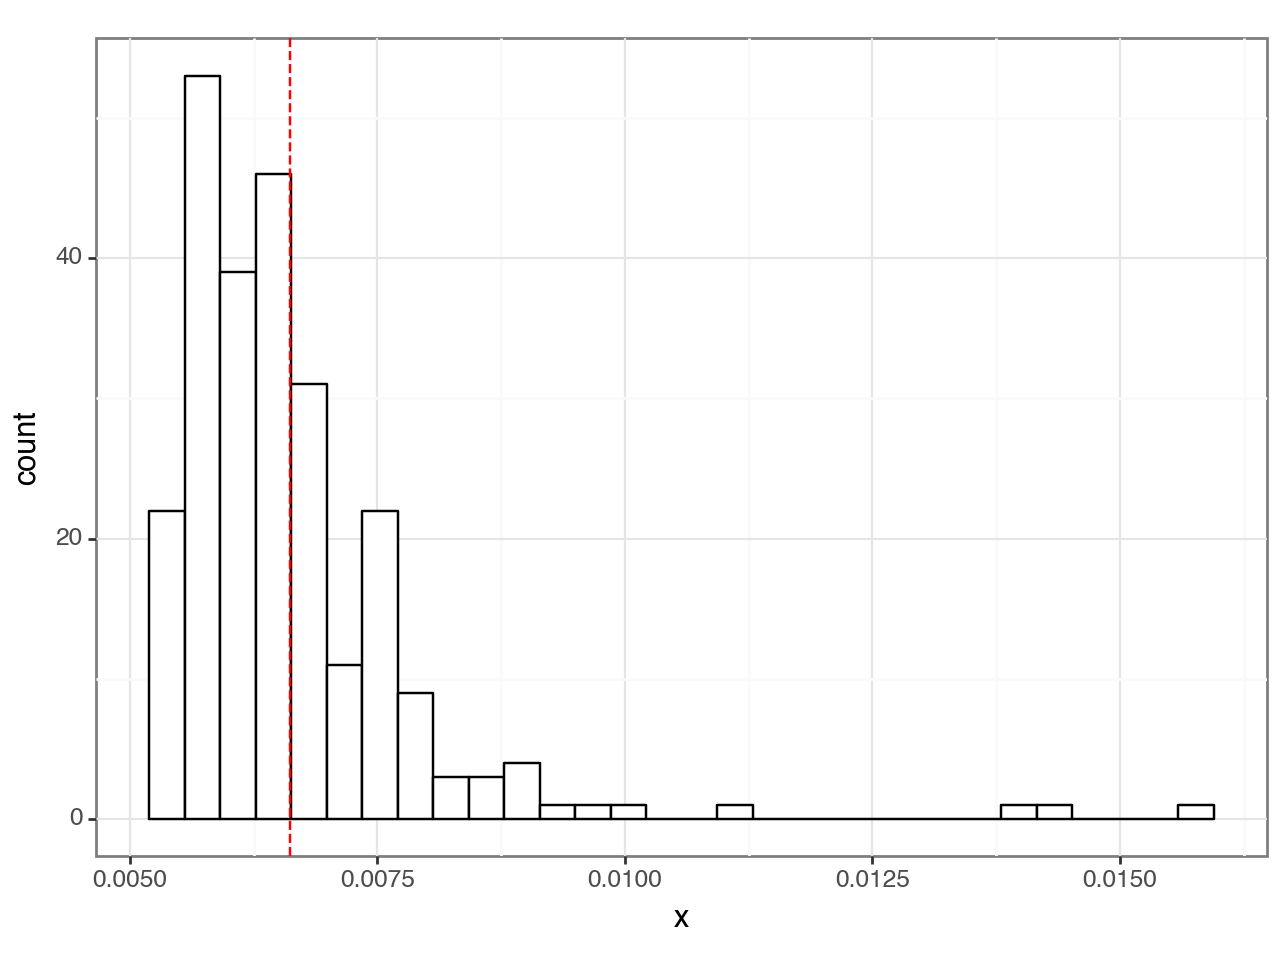

<Figure Size: (640 x 480)>

In [21]:
tts = [TTSSim(X,y, contin) for i in range(0,250)]

(ggplot(pd.DataFrame({"x": tts}), aes(x = "x")) +
 geom_histogram(fill = "white", color = "black") + theme_bw() +
 geom_vline(xintercept = np.mean(tts), color = "red", linetype = "dashed"))

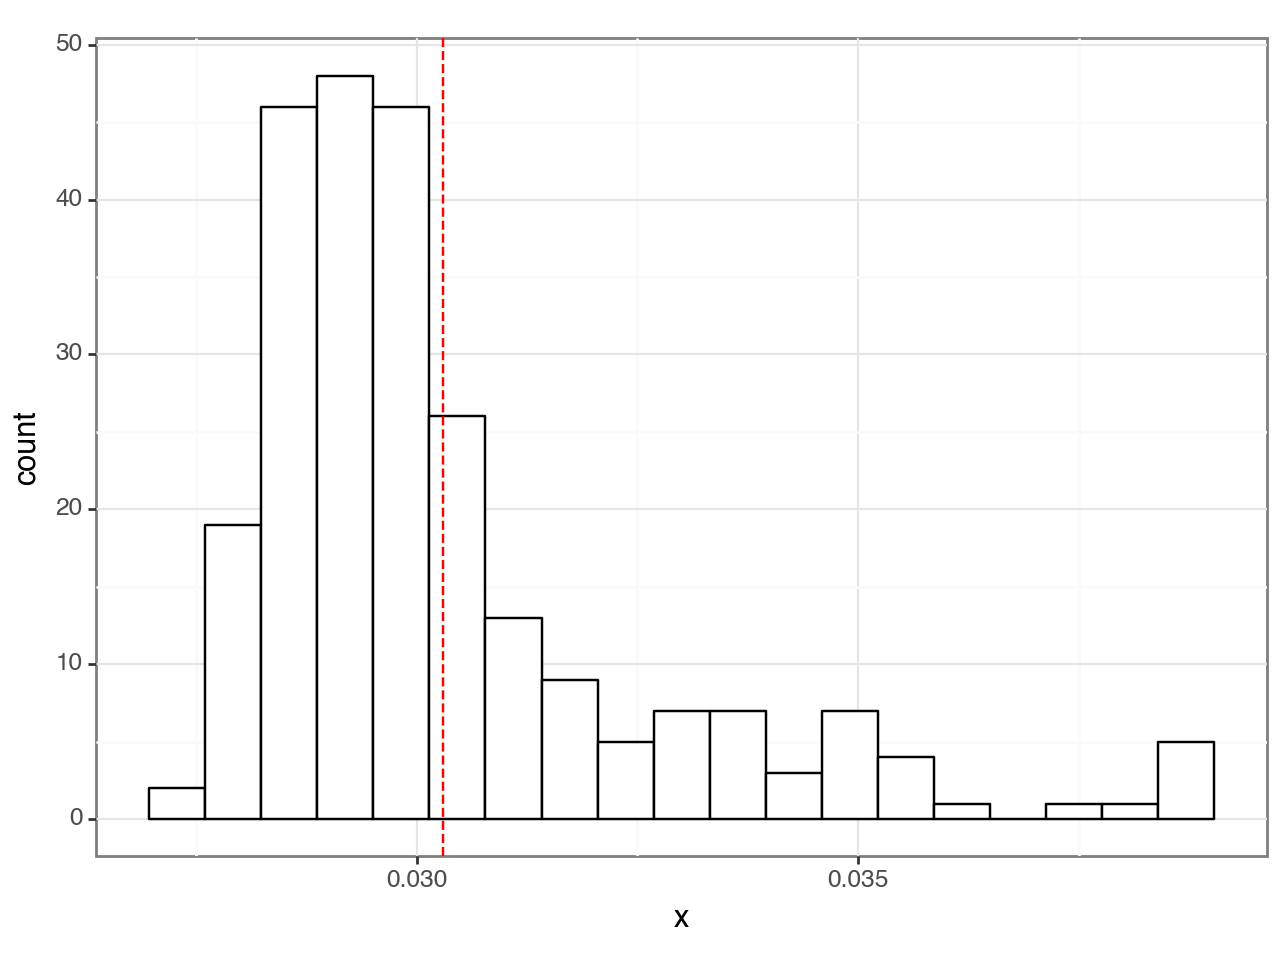

<Figure Size: (640 x 480)>

In [22]:
kff = [KFSim(X,y, contin) for i in range(0,250)]

(ggplot(pd.DataFrame({"x": kff}), aes(x = "x")) +
 geom_histogram(fill = "white", color = "black") + theme_bw() +
 geom_vline(xintercept = np.mean(kff), color = "red", linetype = "dashed"))

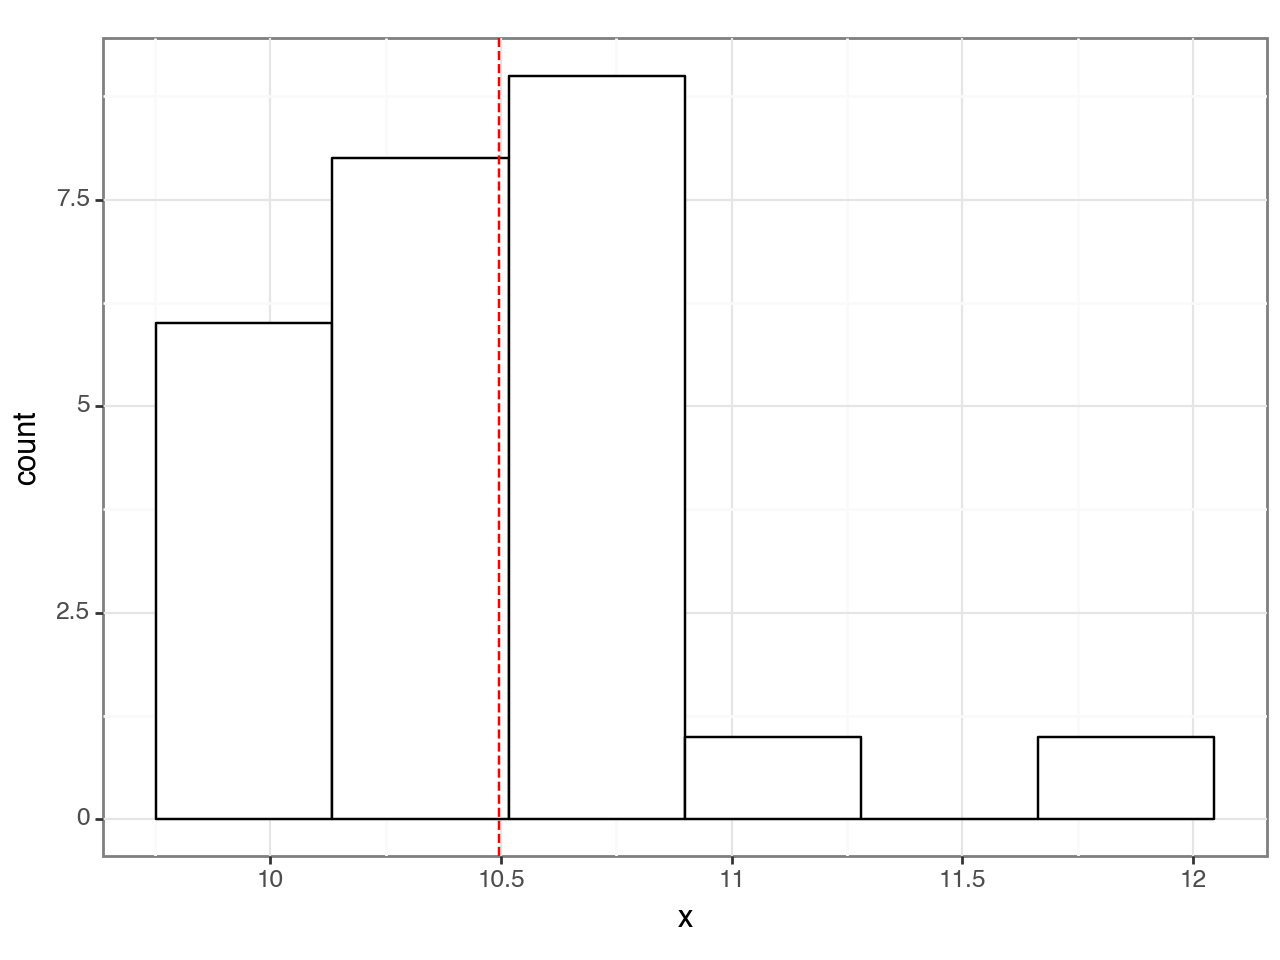

<Figure Size: (640 x 480)>

In [23]:
loo = [LOOSim(X,y,contin) for i in range(0,25)]

(ggplot(pd.DataFrame({"x": loo}), aes(x = "x")) +
 geom_histogram(fill = "white", color = "black") + theme_bw()+
 geom_vline(xintercept = np.mean(loo), color = "red", linetype = "dashed"))

# Regularization
Now that we know how to use model validation to check for overfitting, we might want to help *fix* overfitting. We do this with **regularization** which helps take a model thats to the righthand side of our Bias Variance graph and move it towards the center by making our model *simpler*. 

One way we can do that is by *penalizing* the coefficients of our model if they're too large in magnitude (far away from 0 in either direction). 

## LASSO
LASSO penalizes the sum of the *absolute value* of the coefficients by adding a penalty term to the loss function:

$$ \underbrace{\text{SSE}}_{\sum(x_i - \hat{x_i})^2} + \lambda \sum | \beta_i |$$

LASSO has the benefit of tending to drag coefficients that don't "pull their weight" to *exactly* 0, thus removing them from the model.


## Ridge
Ridge penalizes the sum of the *squared* coefficients by adding a penalty term to the loss function:

$$ \underbrace{\text{SSE}}_{\sum(x_i - \hat{x_i})^2} + \lambda \sum  \beta_i^2$$

Unlike LASSO, Ridge tends to drag coefficients that don't "pull their weight" to *near* 0, thus NOT removing them from the model.


## Penalties in General
Both models create a tug-of-war where coefficients ($\beta_i$) need to "pull their weight" by reducing the Sum of Squared Errors ($\text{SSE}$) in order to be "worth" having a large value in the penalty. 

The hyperparameter $\lambda$ controls how *much* coefficients are penalized. 

### *Question*
If $\lambda = 0$, what happens to our model?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>

## Alternative Regularization Explanation

You can also think of Ridge and LASSO as having a "budget" for how big the sum of your (squared or absolute valued) coefficients can be.

<img src="https://drive.google.com/uc?export=view&id=1-u4GfH6eZg6T0wF1h3M5bjmd8SrMQHcC" width = "400"/>

This graph shows the concept of LASSO and RIDGE in a simple 2-parameter situation. The teal/blue circle (right) and square (left) represent the values for $\beta_1$ and $\beta_2$ that satisfy the "budget" for our coefficients. The dot in the middle of the red rings represents what the coefficients would be if we did not add a penalty at all. As you move from the inner to the outer red rings, the Residual Sums of Squares (RSS) goes up, meaning that our model is worse at accurately predicting data in our sample (remember that we're giving up accuracy in the *current* sample, to hopefully gain accuracy out-of-sample).

You can see that the coefficients chosen by LASSO/Ridge occur at the point of the teal/blue area that meets the red rings. This is because 1) when we penalize our model, it HAS to fit within the contraints we give it (the teal/blue area) but 2) we still want the RSS to be as small as possible (a model that's bad on ALL data sets isn't useful).

## How to choose between LASSO and Ridge?

In general: if you want to do variable selection (i.e. completely remove some variables), choose LASSO. But in the real world, people often use something called Elastic Net, which adds both LASSO (L1) *and* Ridge (L2) penalties to the loss function (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)).



## `sklearn`

Luckily, fitting LASSO and Ridge Models in `sklearn` is very similar to fitting linear regressions.

In [47]:
# Train Test Split
# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# validation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = LassoCV()

pipe = Pipeline([("zscore", z),
                ("lasso", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

Train MSE :  10.454661059653661
Train MAE :  2.215351645556319
Train MAPE:  10.454661059653661
Train R2  :  0.9297507223864445
Test MSE  :  11.909714625980016
Test MAE  :  2.259328809043158
Test MAPE :  11.909714625980016
Test R2   :  0.8363701174119831


In [48]:
pipe.named_steps["lasso"].alpha_
pipe.named_steps["lasso"].coef_

array([11.9318801 ,  0.        , -0.34725365, -0.9196897 , -0.17471883,
       -0.04810751])

In [49]:
# Train Test Split
# Load Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")
ama.head()

# drop missing values
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

# set up X and y
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]

X = ama[predictors]
y = ama["Amazon Price"]

# validation

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# z score
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

lr = RidgeCV()

pipe = Pipeline([("zscore", z),
                ("ridge", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

Train MSE :  8.868452943540722
Train MAE :  2.010931333133316
Train MAPE:  8.868452943540722
Train R2  :  0.8786933239745233
Test MSE  :  21.02471091748679
Test MAE  :  2.268435770587635
Test MAPE :  21.02471091748679
Test R2   :  0.9431360489391093


In [50]:
pipe.named_steps["ridge"].alpha_
pipe.named_steps["ridge"].coef_

array([ 8.23426077,  0.38320546, -0.314849  , -1.05125861, -0.02845635,
       -0.09393699])

# Classwork
## Why K-Fold?

In the lecture we learned about 3 types of model validation: *Train-Test-Split*, *K-Fold*, and *Leave-One-Out* (which is just an extreme version of K-Fold).

TTS is easy, and computationally inexpensive, so why use K-Fold? One reason we discussed is that K-Fold allows you to use ALL your data in the test-set, and all your data in the training-set at (at least) one point.

Use the simulation below to look at how well TTS vs KF estimate the out-of-sample (test-set) error.

In [34]:
def modelValidationSim(n = 100, error_sd = 1):
    
    # Simulate Data---------------------------------------------------------------
    
    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15
    
    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    
    # weight = intercept + length*coefficient + random error
    weight = 0.2 + length*0.04 + np.random.normal(0,error_sd,n)
    
    
    cats = pd.DataFrame({"length": length, "weight": weight})
    

    features = ["length"]
    X = cats[features]
    y = cats["weight"] 
    
    ##############################################
    # Build a model using a Train Test Split with 20% (1/5th) of data in the test set
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    z = make_column_transformer((StandardScaler(), ["length"]),
                                remainder = "passthrough")

    lr = LinearRegression()

    pipe = Pipeline([("zscore", z),
                    ("linearregression", lr)])

    pipe.fit(X_train,y_train)
    
    
    # Store the test-set MSE in the variable TTS
    
    TTS = mean_squared_error(y_test, pipe.predict(X_test))

    ##############################################
    # Build a model using a 5-Fold CV
    
    kf = KFold(5)
    mse = []
    z = make_column_transformer((StandardScaler(), ["length"]),
                            remainder = "passthrough")

    lr = LinearRegression()

    pipe = Pipeline([("zscore", z),
                    ("linearregression", lr)])

    for train,test in kf.split(X):
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y[train]
        y_test = y[test]


        pipe.fit(X_train, y_train)
        mse.append(mean_squared_error(y_test, pipe.predict(X_test)))
    
    
    # Store the average test-set MSE in the variable KF
    
    KF = np.mean(mse)
    
    ##############################################
    # Return a dataframe with the KFold as one Column, and TrainTestSplit as the other (the df should have just 1 row)
    
    return(pd.DataFrame({"KFold": [KF], "TrainTestSplit": [TTS]}))
    ##############################################
    



### *Question*

In the cell below, the model simulation is run 500 times, and the data is put into *long* format using `pd.melt()` (look up the documentation for this!).

* Then use ggplot to plot the densities (or I highly recommend densities `geom_density(alpha = 0.4)`) of the estimated MSE's from TTS vs KFold 
* What patterns do you see? Is TTS systematically different from KFold? How could any differences you see affect your interpretation of TTS vs KF, or affect which you choose to use?
* Try changing `error_sd` (the standard deviation of the random error we add to the simulated data. The larger `error_sd` is, the more spread out data will be around the regression line), does this change the mean squared error estimates? Is there a certain pattern you can see?
* change `n` (the number of samples) to be 1000. Does this change anything? Change the difference between KF and TTS?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>


In [35]:
sim_data = [modelValidationSim(error_sd = 1) for i in range(0,500)]
sim_data = pd.concat(sim_data)
sim_data_long = pd.melt(sim_data)
sim_data_long

,variable,value
0,KFold,0.979355
1,KFold,1.040912
2,KFold,0.985301
3,KFold,1.087720
4,KFold,1.146167
...,...,...
995,TrainTestSplit,0.593612
996,TrainTestSplit,0.862049
997,TrainTestSplit,0.942580
998,TrainTestSplit,0.956255


In [ ]:
########## YOUR CODE HERE #################

###########################################

## Regularization

Use [this web app](https://shinylive.io/py/app/#h=0&code=NobwRAdghgtgpmAXGKAHVA6VBPMAaMAYwHsIAXOcpMAYgAIAhbOgYQAs4AbAZzijoAKUAE6c4ZMoK5jhASzKyAOhGWyYqYsMkwoZVJ2JlOsgEZZs+w3Sjc6+ssuX0Akus3biAEwCuY2wDNNOhgvLlkIAHNVNy07KAhPG2tbVE9ojVjeKBNNCGS6bghuRwgXGMlCb24yYhhBbDI2UjoAMW8IQgVSAOFaugNCKE46f1kxZX9eupJ1ETg6NQyK2tQ5vAK1AH1EsigJqYK2cOZF9zoAQXR15whUbzJudYB5e7uH9YBlOG5uWVJ14R8TqyABucABlE8cGE628ShUpToOz2ECKalsAF46ABGAAMuOUvzqWOARO2uigAAoIBi8fiAJQjIKyBZ5YTxCJwSm49ZomDcekAXRKTms6GUaFQmzhdCxcKwUE5m1GAA84J5Kco6Nq6PQoJ5PHQOPq6I1dNZOAYAO62AAyUAAKnAABqm4h0EzzTyybj6KDYdV0EGyfgAWV0bAAUlAVVqdfLjZ5NiRyJQyJq8jqs-LdhFuBhuIQ5Kh03Gs+WCsJCBjFGA2BJUNxEAB6Zs6RoAKxjGGE1W83uIGBmzc4um+ZGb4ca0ZVGA73AA-CnRhEMU7nQBac6hj4b0Oh22bAASDoPmn3ttrZfL9Lw1+zsgwufzheLpczFaztdk-jolKt4SeMQVoYFOUYxoyYEzhgR7eGYACK3hwEhlLAAA5A6FjfOIaHrFB3awSYgr0gA3FeH43neFG3te8okJw3gwBAGafjiPL3jqIC1oQo4-LWiB0NxxCcBuMCeBueJ0PRG6cBEG4ABx2NgG4AKzBCqG5QPc7oUCqZAyXJhBptCppwHpMlwP4DhgAAvlRrH0A68jjBRD4YGw2KamAR7AXQAAixDfHQABKcARL4IiyAAXrofx5B8ZCApEjQXP4-hwJ0rCBWlsiELIaZ0AAotUahjoutY0a5Or0OEbwFMYULCNelVufRjHMRx2p4vZn5cUQvHFEgglEMJoniQA7Ip0myapSkbgALOpmnabWdmdbqdBOUYcDrfKtX3Js3ANdCLGsTqtZ7Pg61fmAXxiJl-CheFo5yDFXTxYllARI0iC1j1Z10LiGD4iDIPYv9Z3g9dOpA1DVUVtUcCoBiQO4nDAPagBniNDWYB0gApH960tZ+8qoKdAN9TxNiDQJtYlgtBQ6Jaq0Q6xtaUoVUCEGwppqPM2DEN4UlsBy8yNPMR2yI1rJvOsEsbDAEXvXQAGWqaUAANaS7U4v826dDCO0GD0kT8N0CT2qW3QdHCe1FPltiABMbOcdxA38cN01ydi2JzWpMAaVpNSs+t9BC3o9x2AYDjm-KEdvJslilmAycVRD1v0IVKp+tAKvxIa2eWICpl6YbvkASlZBWu6cAAI7eEMG5YylbVMcUFHyr0VoO61dtMb3n7ddD2pUx7Q1CSJM0AGz+0twfEKH5tuWw81eUXo553F6cjzbj7k7vN1XmAh86gA6hweRWuL7LhHQ4Y8+E8y2nwwgQOEETBKEPD9LI2u-xAV+hswqAh+HFR4-RiARB9AoQgp9tSAgiKA343R1hBEAd4dkwxAHV00JrCB18kTum4O6EwzAoSjHfpEawkCfgjHaMCUg8DrAJGCOENQ0UP6mlFpIAwdD-AMPehgC4tCAiCLigsWw-B4CJVykyJqy9PzwBsJgrhTQrR0EFpgr+UJhg+jsNCQIwgYBcKtBwEu1oTL6M9BIaEwiWiaGYWZWA+hwT3z4PFBucxC7CF6MISRNC+FiI6CrM02g+DcEwUFBW3AvGAjSIois3pqjxCMn+ZoUAwTsk5IyGx19KA0JCLotCthwrfF4FI1hCtEpISDEMJC+Zj7kQxhbV2FZ6D2nXLvMmXkAAkvSdyFVlIJRQozJjcxANiGyIAIA2RGaMyJMBNggFkLSGyAA9GZczKQAE1Ngsg3CMnhIAdk2X2fSdZTt+k70SXvLAg8AZNJPrcrMT0IqvVis0Guwh8EemYPqb01D+CoEoEMMgzAajcPmEE+hISJF300I1ZhkKQXQGMFFaFIhOQ6K4HEdkMjoT5joDcOgton4iBCiA8pcV5YcAMWi8FzDwhFgiUFMxBSYnRXmMQX8CsSCWVGHlNMthmWAhsN8YRDAMpaV4FC0RzCBFwuaPonQUIbaoDoDy00NduEfybHKzQshoFotEbCxheRKQK0GW0s65i4CMgLnK1FYLsDrFQPE3KNRezBCqJINCdx1YS1kP46+Rr6xoT+cAnweVIjIrpYMuglAhYRF5pCz0dA0LfMaBGhWzrODguEQ6I4thBhVCCtwZmnBYTv3KPEWOLSszuvVJ6zQthIWizBEzIYwwggYt6FJbKgr8rkEaSfMdu9rasR6cwp5zDbTnA+B8J4f5bTYgdaw4K0tsWUltE7B1JdcEDpgCEPIRj+Sat-G8l60VPkQGEfOxdTxmEAqkfSl1BsFYwsVeayNuxNZcIVtkEhDEKB1IYty38QI2DMNWPi8Q0Jmz8pykK8g6xHUAoAxwOo3a3ScglsIYRm7PDYpfdYGDoL80Qp0nSr94jmhkI1v+6hMS4kQcTdzaDLydSwdgPB4QiHB25WHWQNDrCMPMawxaYYNQ8PmIwLO25k7PwdMdC6bp+8HlnVrP0h9S7hmjLGeyQgkzpmzPmYoRZyzVlTM2WZ3Z+y6CHNGcc055zLl0AANTmdHDAEwiRzPtEaiYIzcAuIGcsyADsazNmoDmQAHwM4oGxUBNgdji2cxLukyAgDzeCmy1znktKUxWadXHtTad6UR7FWJEvjOM1MrZ5mIvWY2Y1+zByjm6BOWc2QFynaee87APz-BEuBehMF7moXEsRaizZnLczEvJdS5cjLBmss5Yo3lgrE6bVuQPmV4aTSDsXwKVULhiD3k3veusQhStqgi2IMQWVCsLvXrehI6oSVvqcYbTqSkvBJbHX8dkYgYJGRmNyrzfR-AICMU9P4sJBRBh+CNL5UWvY2CcGYNfcjaKuXCOcL+W7vgFD6AhXS3LzAGM8m4boEpcruC8fyBAKwHaP7PrfZR6wkhu2Sqjj+VW8wlb5tkGTp1m2qfMBUviWl5oa6+ASb97UeauVOpELxig3r+Axy-oCeT47CsY2K+WadYBrkGZ88N8z62AkvbCpd97zRPtfUaBgfLvSbmsWttbLuwFNO2wYgPXew9bljxpp7SeBkNyzxwLNQOy0Q62V2-GR8q9145wMICT3GMEwqS8iwFYkVqG6aeOsKrbjHVksARSp6yDt5gGN3tzT7MDfMLPvIVNdKpYy3NLDP8CsKFaXzYyAwxBNbc7lTkDPVhzTVOIBqnlcb5irE5IW4thxgJtrpUhodwqRgHDpLiRWytAzIgKOIIlDiFFK-YzzJEFJz+SAVmhEEwEuDcAjZSc46xCrXGeOsAAVXWB2XWDPkZCAiNEyR1ngGYUBFHHem4COA1Urk725XuBmHmEpGdEZERyFn8SKVxX0SbW9GBEiGEXOEgI7hv0-SxXHETTSgyif0viKj-zoFLzoCALoB2RYUNEoW7WYDPkoIZ0rXHCcQYMymaGdDX3mALyKFIDrVsEpAYDwBYDwD8jwAAHE8Ajw8BIw8AABpRkDteYIDO2CgLHOgFneg9KCQhEG-KQhTIrZPbUU3W0R7cfWfOlDQ9kVAXmdDbgcfLRXsLgXlDgWVBucccBX6BvZwu5Z8DAXwZvUmR8eI4wJIx5VvA7ViC+SHHFYYHdclGEUlBdJdMvLde1UyBINtd0YwuVI4FNUQrIz8HfITYVBcOgC+c0ICaJdfcw4YLRawHIKOBWEESKIWKgm-T8XLfKWwKDPIyghcRwpXRvZIp8RUfMNI5hI+cdJoisToyQUWdASgaouVEvAdAVVokdeROVWQkhaAcgLYqYj1ToVtP8BgDcQw1WI4O-WoqwsVYYAVRgzVPIZ0RYzIm-FYkrFI9YjATY3Yw7HYyYz8ItZ+QongkKcorKC4lDB4SBMfRWMYClIxKFR4isW4+Qq4pQj43JKOMxOnWwKWFNIwchH8dKJKSQPJOADlLDRY+ErMfYohHo2faQTRIWQYiOL480cvTnBQIKICMEo7CE2ItyVI2QdIrTcEpE8sc4A9GjWg-xQEzoRQ84DcZwB1cQigQ0b0Bg9kiws0PICWUk8sCtbtEyQ03EykJ4DcMAr4gpAY0VVlOVK9SKR3OwrUrMBKL7RoBUxE5Y2IyEu5NgPPWsAvWYOQahPyVk6EAqYMj5FWSMl3NgQaBM0rG-JY37AAOWAlhF+Ak0B2lhMk8PFnnwvTV05HWB5jFiDPtze1vWYQLOSjYELWEGYFGPAy33NDmCDGhGYGtHWAIPZAoFE0NCyWYHqKHPLLOhLI01rDcPxKbLoG8LQD8LEwCNFMwV4E4FCOwjoAiJKm6GiO3LWLzASM4HVJVJhLhPDM3JvwFMONRROIVjOMdWlIIJ-nZQdLpVzKu23nhIHO+wCSGBCHu1xBjOaTjOYRzE-LVKdJ-KVz-MlGOI-TpTOLAvpxaJxNsAgpJPhOgtDLoHgpSn0VXKNDDTQsN1+wTI-JfK-K1Lwt+wClOLRNr2pWaAouExLVFkiHmGooGM7OkqdLotvQYs+kHPaMpAFxIRuzYFdQWF-BZxEy+OYAMoXFNk1M4vjJtW9whnDleCjmTgZKRnV0tMjX+OsMYMUNf2vh4FvHRL7WIA3HdMUJTDuIUNNk7kfDbg6nNmdhtTDz4gnhGinh9j9ljwDiDm0lLn0iMlTCaiT12lTydi8gEBjlsC+B4xcoYwADU38f5HVyT7iHhs8rYIYA97Z1pYr1p4raYvZRoZpfZggTBZpUAhr0qE9F58q45HwE4Dpk4vJk4qqngz5CpbQPhmqTdpq7KyAk4Y55qY4WAngKyl0KzzgKyHQ1qYjmoqJwqSgKFz9hAskNLbh7gBIbg3gIEZqyABIXhI53hz8wFSABIvgAaIB6RfoKJ6AxVgRO0WAhhCBadJAjYihijH0yjiMK9WEq8gEwLbBmhORAFFzT8KRrwAABKGhQMEDAWGzgOBCiO6nGykMG9aMkIYXw-gEkGYWDLkTwfwNDTgNmjEfaMgDAKkekRkYknm1kRWYUc2Fm-m0WYZVIIcUgQYdMOWtmm682QEMgTBPIdW0WEoLMWy366OKwLVHDIkZWCRcS4VUmz60mpKRqLAXa8KrMO6uapm82egPDe-XYffPocm0EGQuG5mrYVmhWrEBmzWhyKSMVUDZOdEnQaAEjccDgWBCYisFcNDFURW-NAsOCByxm9aGMfrLEQofMKfOa3eFUXGFMXjQaWI7AWu7KBu3eNgJCXGMCs2FpZEDEfWqAWImMDEGMWIxFaEDEYAGdMAc4bupXWsQqWe37WsZwRehtWsJ9K6A7WsAA1elpWsHZXejGWsM+Q+jIhgU+jUlgC+lvPya+z8WsDQu+isWsI8J+8sWsSMN+m6fQt+wUKy9aCQfTMAAvbE4TIqEqdsNlZg8O9m4aAbT7J6t4EWxm12z8EugscQSkFUUcT0TgXGP6TRHBrgXGEB5DMBqq+pHafAPmbaDECQVBisbW3WkYI1Q26qTVLa02yQc29WS2+A62wTSiv8Ly9-YErHBhugEm+2iiMmyEOxD268d2mORa5a1axm8GmOn2s-SYAOoECm4Omm0OpZGB4ZKO9aERn+EkPIO+Se6egh+e+xsAFe6h9exxnelxsAA+jxk+sAQUa46xvWsO+WqAZW6AeAbgGW1ifuzYKq4Zfu2E4gQgYACxiJth9pWOvgeOnXR1JOxUEw1O8QXKDO8sLO6wHOrEewfOkwQuiRrMEuuJooDASu3a6u5usJ74N+puoSSyVu25duuATu7+N+3u6Jqqwemuke3eMe4QCe2sGejxhejx5x9YVxjx9xlZzxxxnxv+4mAByQGrMAFRlarEshgqYqBQSBqi6B4JoB+BxKRB+4ZBsW4ulUJ2DB9MbB7IYh4+dYbAIhvBlMwR8hyhghhQWh+h9aJht+FhqIMM7UY2uqBOnh4YPh5Sm2ykkKik3E0gcRu2rah2uRgjBRumyyLhg6o6w606869RsOOgLRh-HRuoQOmGkO2WoJtm0x7+bgIuuF8sTFxqzEOgSe25AJoV2sc+jxq+jx2+jxx+jx1+jxz+jxn+3x-xqW+Juu8J9aSJz8aJlgOJ9l0WBJpJ-lhQmW2lllMcLhxO+IPJ6wAp9O9aUpmMXO4WyJap0qnl1iepsuxp5pwwdUmuoSdp3plpLpkaHpt+-pwZ3RYZikPuw1lLVQ3eIeyZ25aZ2ZsACVjZqVjZmVjZuVjZhVjZpVjZlVnZ82WpnUQBg58l46qlk53fcgcBi5sqX0vIExg5u54QB54W0Wqt7UdB3gD5-5-B6hv5r5gF4BoFgqCh8DUF5yAZiFrW8QZhlcEUaAdAYZS4cmSUaUWQdYXgB66EcKpPcAdp6gTmuYcwfAEaVMKgZAU4WIWHdQf5WwW4dIM4VYBIJIJIVIfYPoAIsQEQO9YwavYQTYMChYcoUlQokSkGtG9s0lGmYgH-XiWBCs8QEoegChJ+M1BA5QO6skZEakWkEGT2o2ylIYOgChuQbIPwa8CgrEW4HsAuWoDAFnYxIYbkdYcGSwiRoZZjzAdkBIdjzj5mHjnEXkCR5wYZFjkToCGADjzQCTmnPj0G68ZdIT1j0TpT8T7jtT6T68AAuT4TtjvTlTgz3joziibg7ThTsTyzt8wz-j68QQ+z8z5Trj5z6z1z3l+gAAiAOAscQ0WjkMEwBjiiBgUznTxTrz1T3zjTiifVjz3T+LqzqTvzrMPyGLhziz7zyT9TiRjQ3Lzz-TnzzLpLrMI8UrtL8rwrmzrMSMWruL+rlzqrnUfQlrxzgr9r6O9h9FpqiiWB52DAAAZnmmvHmCxHkgwCdjG+vBZCxHGgwHkgW4ondCxBUgwGdlomGTG4wHmnkmvGYCxDeYAE5xprwNEsRsRxvjv-O2D0DdZrxXQsRNM6R1ovMKCAAqMjc2LzIZP7naAH4lOgP7+EViLzZdP7xeUHkzv77wL7rg8HzRZHwQv7q0ZH+TsrpzwrlSRrnUfr7UN7v8V0Q5Fj5RZibAxkZsSwzAaoDUbA+FugKKDcQsTQeYZ0a8egBWQwcxOpOjiLoKIYMVTwNcqAwpDxVso-R1bgQ0LVbENJjaPyB-FoODRR38CpzwDAVX3YdX3jTTLiW5OZz2b-XeBxoaX-C3pxz2ZwWI1Z76h3sAdxgSIAm3iVgSZQm3qVgSZNk3sAGVgSdQm3uVgSLQm3hVgSHQm3pVgSPQm3lVgSfQ53rxgSEAm3nxgSM+Z37noaZ0G1GyZqa8KFvIHmjdu6q9wESkHmvmgWtdDRnUdKc0EkU3jx7N4aXN4afN4aRZgtxx4t4aZZ4aDejZ9Z4aUt4aFVjZrxjZ7Z5X+gMD1+a8TgfxLELGkQeDlBZiCR1fjAUYdMHm4AZvsgP+pEfwWxvP4iFfiDkgYZPfpDTYBf-oFDlflD4Ze0H4YgSkGB4e4J9YA-vslypGQSwa4I2G4hqB4NUYoMNGPORjD7JNcZHUGLvxQ7795ANfC-ifzP5H9awV-FAV-2TCbcX+X-ZWpZCf6Pc5A6NEvpiSxDl5NMv-HmgWEOJwBgAuIPxn9xgYAD5AQAzXCALIBgCkI8sYSCjGBgwC+OOgFUAgPHqH58QxfCiJQNXwH8MBx-TJtgIv64Daw1-eQeUUIHDIFBcAUgf4HIHXhNWQULECf1R7rcswSGQVixxTCq1QUFAVCKv0IHrABoxAVwYbB0EkAtB14KDvZyRiZNNMLHEQOyGwCoRdyhRRxiXkcbl5NBxuYAGIGYgn9fKSQykCkLcGUB0hmTIUDahjA+gUYGcZXpLW1668KQBveAJSCpjyEtWQ0UwRAm6b+AeqNgjZl3SGhgUbIxPYBDrWhbl8IAtkQUEAA) that I wrote to play around with the regularization strength of the models. *MAKE SURE to scroll all the way to the bottom to see all the graphs*.


### Questions
With the slider at 0.1 (the default) look at the boxplot at the top of the page. This shows the coefficients from 1000 simulated data sets. For each data set the 'vowels' (A, E, I, O, U, Y, W) do have some relationship with the outcome (X) that our model is predicting. A has the largest effect then E, I, O, U, Y and finally W has the smallest effect on X. The Consonants (B,C,D,G,H,J,K) have absolutely no effect on X.

Look at the Graph and ask yourself these questions (questions also listed in app).


#### Comparing LASSO, Ridge, and Linear Regression
- Which model (Linear, LASSO, Ridge) tends to have the highest coefficients? What does this tell you about the various penalties each model has?
- What happens to the LASSO coefficients for the Consonant predictors (B-K) which have no real effect on X?
- The Linear and Ridge Coefficients look similar for the Consonants (B-K) but what's slightly different between them? What does that tell you about what Ridge penalties do?
- Are the larger effects (A-I) affected differently than the smaller effects (O-W) when you increase the Regularization Strength?

#### Comparing Different Regularization Strengths

Now, using the slider at the top of the page, change the Regularization Strength. Try values that are very low, moderate, and very high.

Look at the Graph and ask yourself these questions:

- What happens to the LASSO and Ridge models when the Regularization Strength is almost 0?
- What happens to the LASSO model's coefficients when the Regularization Strength is very high?
- Do the Linear Regression coefficients change when you change Regularization Strength? (if so, why, if not, why not?)

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = 200px/>